# Loan Approval Prediction System


#### Importing the Dependencies

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [164]:
loan = pd.read_csv ('loan_dataset.csv')

In [165]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [166]:
# viewing the first 5 row

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [167]:
loan.shape

(614, 13)

In [168]:
# ststistical measure

loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [169]:
# no of missing value in column 

loan.isnull().sum()    


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [170]:
# dropping all missing value

loan = loan.dropna()

In [171]:
# no of missing value in column 

loan.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [172]:
loan.shape

(480, 13)

In [173]:
loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### label Encoding

In [176]:
# Columns to encode
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area']

# Initialize LabelEncoder

le = LabelEncoder()

loan = loan.copy()

for col in categorical_cols:
    loan[col] = le.fit_transform(loan[col])


print(loan)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          0              0   
2    LP001005       1        1          0          0              1   
3    LP001006       1        1          0          1              0   
4    LP001008       1        0          0          0              0   
5    LP001011       1        1          2          0              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          0              0   
610  LP002979       1        1         3+          0              0   
611  LP002983       1        1          1          0              0   
612  LP002984       1        1          2          0              0   
613  LP002990       0        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [177]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [178]:
loan['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [179]:
#   3+    -   we cant feed to ML model , we want to change

In [180]:
# replaceing the  3 + value to the 4

loan=loan.replace(to_replace ='3+', value=4)

In [181]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,1,1,4,0,0,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,N
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,Y


In [182]:
loan['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

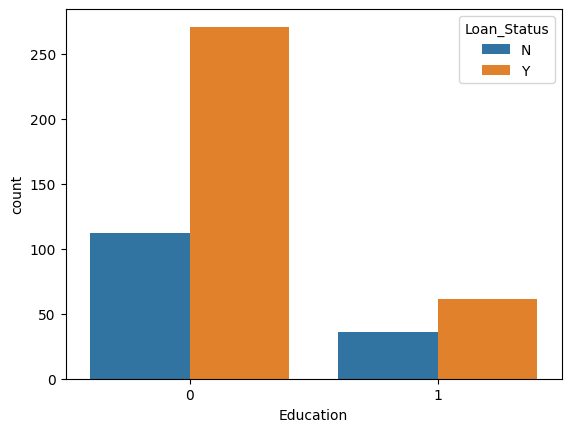

In [183]:
# visualize the data


# here we take  education and the  loan_status

sns.countplot(x = 'Education' ,hue ='Loan_Status' , data = loan)

<Axes: xlabel='Married', ylabel='count'>

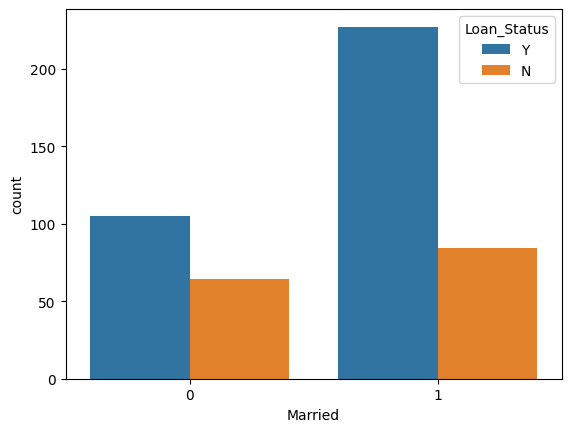

In [184]:
# here we take marital status and the loan status

sns.countplot (x= 'Married' , hue ='Loan_Status' ,data =loan)

In [185]:
# standardize the column

In [186]:
cols_to_standardize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the dataset
loan[cols_to_standardize] = scaler.fit_transform(loan[cols_to_standardize])

In [187]:
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,N
2,LP001005,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,Y
3,LP001006,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,Y


In [188]:
# seperate the feature and the target

In [189]:
X = loan.drop(columns = ['Loan_ID' , 'Loan_Status'] , axis= 1) 
                                                       

Y = loan['Loan_Status']

In [190]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0        -0.137970   
2         1        1          0          0              1        -0.417536   
3         1        1          0          1              0        -0.491180   
4         1        0          0          0              0         0.112280   
5         1        1          2          0              1         0.009319   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0        -0.435196   
610       1        1          4          0              0        -0.222210   
611       1        1          1          0              0         0.478206   
612       1        1          2          0              0         0.391846   
613       0        0          0          0              1        -0.137970   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [191]:
print(Y)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


In [192]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,N
2,LP001005,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,Y
3,LP001006,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,Y
4,LP001008,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,Y
5,LP001011,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.435196,-0.604633,-0.916831,0.275542,1.0,0,Y
610,LP002979,1,1,4,0,0,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0,Y
611,LP002983,1,1,1,0,0,0.478206,-0.512854,1.346168,0.275542,1.0,2,Y
612,LP002984,1,1,2,0,0,0.391846,-0.604633,0.525520,0.275542,1.0,2,Y


## train test split


In [193]:
X_train, X_test ,Y_train , Y_test = train_test_split (X , Y , test_size = 0.2 , stratify =  Y , random_state = 2 )

In [194]:
print ( X.shape , X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


## training the  model 



In [195]:
# SVM 

In [196]:
model = svm.SVC (kernel='rbf', class_weight='balanced', random_state=42)

In [197]:
# training the svm

In [198]:
model.fit(X_train , Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


## model evaluation

In [199]:
# prediction on training data

training_pred = model.predict (X_train)

acc= accuracy_score(Y_train , training_pred )
print('accuracy in training data  :',acc)

accuracy in training data  : 0.8385416666666666


In [200]:
print("F1 Score (weighted):", f1_score(Y_train, training_pred, average="weighted"))

F1 Score (weighted): 0.8284301346801346


In [201]:
print("\nClassification Report:\n", classification_report(Y_train, training_pred))


Classification Report:
               precision    recall  f1-score   support

           N       0.85      0.58      0.69       118
           Y       0.84      0.95      0.89       266

    accuracy                           0.84       384
   macro avg       0.84      0.77      0.79       384
weighted avg       0.84      0.84      0.83       384



In [202]:
# prediction on testing data

testing_pred = model.predict (X_test)

acc= accuracy_score(Y_test , testing_pred )
print('accuracy in testing data :',acc)

accuracy in testing data : 0.8125


In [203]:
print("F1 Score (weighted):", f1_score(Y_test, testing_pred, average="weighted"))

F1 Score (weighted): 0.8061594202898551


In [204]:
print("\nClassification Report:\n", classification_report(Y_test, testing_pred))


Classification Report:
               precision    recall  f1-score   support

           N       0.75      0.60      0.67        30
           Y       0.83      0.91      0.87        66

    accuracy                           0.81        96
   macro avg       0.79      0.75      0.77        96
weighted avg       0.81      0.81      0.81        96



## Preditive system 

In [205]:

def predict_loan(input_data):
    """
    Simple function to predict loan approval
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Convert categories to numbers (same as training)
    input_df['Gender'] = input_df['Gender'].map({'Male': 1, 'Female': 0})
    input_df['Married'] = input_df['Married'].map({'Yes': 1, 'No': 0})
    input_df['Education'] = input_df['Education'].map({'Graduate': 0, 'Not Graduate': 1})
    input_df['Self_Employed'] = input_df['Self_Employed'].map({'Yes': 1, 'No': 0})
    input_df['Property_Area'] = input_df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
    
    # Handle dependents
    input_df['Dependents'] = input_df['Dependents'].replace('3+', 4)
    
    # Standardize numerical columns
    num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    
    return 'APPROVED' if prediction == 'Y' else 'REJECTED'

# Test the system
test_applicant = {
    'Gender': 'Male',
    'Married': 'Yes', 
    'Dependents': 2,
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 'Urban'
}

result = predict_loan(test_applicant)
print(f"Loan Status: {result}")

Loan Status: APPROVED
